<a href="https://colab.research.google.com/github/negodinaarina/data_visualisation/blob/main/fourth_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [ ]:
%%capture
!pip install pymorphy2

In [ ]:
import pandas as pd
from pymorphy2 import MorphAnalyzer
from string import punctuation
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
%%capture
!pip install pyldavis

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
from gensim.models import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud
from collections import Counter

In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install networkx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
link_hobbies = "/content/drive/MyDrive/hobbies.csv"
link_activities = "/content/drive/MyDrive/activities.csv"
link_internet = "/content/drive/MyDrive/internet.csv"
link_lifegoals = "/content/drive/MyDrive/lifegoals.csv"
link_smocking = "/content/drive/MyDrive/smocking.csv"
link_timespending = "/content/drive/MyDrive/timespending.csv"

In [ ]:
df_hobbies = pd.read_csv(link_hobbies)
df_activities = pd.read_csv(link_activities)
df_internet = pd.read_csv(link_internet)
df_lifegoals = pd.read_csv(link_lifegoals)
df_smocking = pd.read_csv(link_smocking)
df_timespending = pd.read_csv(link_timespending)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Предобработка


## Класс Preprocessing

Метод Preprocessing.test_process(text) обеспечивает предобработку данных по следующим пунктам:
1. Токенизация с помощью функции word_tokenize из nltk.tokenize
2. Удаление пунктуации (список пунктуации взят в библиотеке string)
3. Приведение токенов к нижнему регистру с помощью метода lower
4. Удаление стоп-слов (список взят из nltk.corpus.stopwords.words('english'))
5. Лемматизация на основе библиотеки PyMorphy2

In [ ]:
class Preprocessing():
    def __init__(self):
        self.punct = list(punctuation + "'" + "’")
        self.stop = nltk.corpus.stopwords.words('english') + ["'ve", "'m", "'s", "``", "n't", "\'\'", "n\'t", "'re"]
        self.morph = MorphAnalyzer()
    def text_preprocess(self, text):
        text_tokens = word_tokenize(text)
        text_punct = [token for token in text_tokens if token not in self.punct]
        text_lower = [token.lower() for token in text_punct]
        text_stops = [token for token in text_lower if token not in self.stop]
        text_lemms = [self.morph.parse(token)[0].normal_form for token in text_stops]
        return ' '.join(text_lemms).strip()
prep = Preprocessing()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Py

## Применим полученный функционал

In [ ]:
df_hobbies['lemms'] = df_hobbies['comment'].apply(prep.text_preprocess)
df_activities['lemms'] = df_activities['comment'].apply(prep.text_preprocess)
df_internet['lemms'] = df_internet['comment'].apply(prep.text_preprocess)
df_lifegoals['lemms'] = df_lifegoals['comment'].apply(prep.text_preprocess)
df_smocking['lemms'] = df_smocking['comment'].apply(prep.text_preprocess)
df_timespending['lemms'] = df_timespending['comment'].apply(prep.text_preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Просмотр получившихся датасетов

In [ ]:
df_hobbies['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                        spongebob art
1                          hobby master list subreddit
2              favorite hobby combine resin dandelions
3               today sewed new teddy bear name chenko
4    started woodworking covid one recent projects ...
Name: lemms, dtype: object

In [ ]:
df_activities['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0              reading book meditation listening music
1    lose reading fiction keep late like looking sc...
2    trying get reading struggle read like 10-15 mi...
3     go bed early spend time productive early morning
4    honest question thinking actually different st...
Name: lemms, dtype: object

In [ ]:
df_internet['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    100 specifically uninstalled facebook phone re...
1                                       feeling better
2    thing helped little bit wild often thumb went ...
3    yeah heavily addicted tik tok instagram mindle...
4                                            control 🥺
Name: lemms, dtype: object

In [ ]:
df_lifegoals['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    going write reading everyone else wrote entire...
1    good choosing makes happy caring much expected...
2    sit sofa wife watch movies play pet lizard eat...
3                                       guy knows live
4    life goal picture picture modest tiny house wo...
Name: lemms, dtype: object

In [ ]:
df_smocking['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    fucking stupid idiot thought trying cigarette ...
1    partied quite young everyone smoked tried foun...
2    young rebellious teenager bound determined any...
3    drunk prolonged period time people call univer...
4          curiosity get addicted thank goodness smoke
Name: lemms, dtype: object

In [ ]:
df_timespending['lemms'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      home favorite place earth stuff favorite person
1                                       plus dawgies 🐶
2            want work sit couch dogs watch trash show
3    literally rn go work tomorrow…lol fat orange c...
4    saw post similar month ago someone felt guilty...
Name: lemms, dtype: object

## Выводы:
1. Написан обработчик текста обеспечивающий полный цикл очистки данных для дальнейшего анализа
2. Проведено тестирование данного обработчика

# Тематическое моделирование

## Подготовка данных

In [ ]:
df_lifegoals["tokens"] = df_lifegoals["lemms"].apply(lambda row: [token for token in row.split()])
values = df_lifegoals["tokens"].values.tolist()
id2word = Dictionary(values)
corpus = [id2word.doc2bow(text) for text in values]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Обучение тестовой модели

In [ ]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=0,
    chunksize=100,
    alpha='auto',
    per_word_topics=True
)

lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.038*"already" + 0.037*"point" + 0.017*"kind" + 0.015*"used" + 0.012*"want" + 0.011*"like" + 0.007*"things" + 0.007*"right" + 0.006*"find" + 0.005*"goals"'),
 (1,
  '0.031*"want" + 0.019*"anymore" + 0.019*"god" + 0.019*"mom" + 0.019*"impact" + 0.018*"honest" + 0.017*"life" + 0.015*"mental" + 0.013*"worrying" + 0.012*"goal"'),
 (2,
  '0.050*"goals" + 0.037*"life" + 0.034*"happy" + 0.031*"want" + 0.023*"like" + 0.020*"healthy" + 0.018*"goal" + 0.015*"feel" + 0.015*"time" + 0.015*"lack"'),
 (3,
  '0.034*"people" + 0.033*"want" + 0.028*"help" + 0.025*"eternal" + 0.014*"goal" + 0.010*"life" + 0.008*"walk" + 0.008*"jesus" + 0.008*"work" + 0.007*"goals"'),
 (4,
  '0.041*"want" + 0.029*"back" + 0.024*"things" + 0.022*"learning" + 0.022*"simple" + 0.021*"country" + 0.021*"anxiety" + 0.021*"potential" + 0.021*"slow" + 0.020*"keep"'),
 (5,
  '0.061*"balance" + 0.039*"answer" + 0.021*"routine" + 0.021*"seen" + 0.014*"happy" + 0.012*"life" + 0.012*"nothing" + 0.011*"want" + 0.011*"kind" + 

## Согласованность тестовой модели

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=values, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.32485567382986713


## Обучим n моделей 
Пусть количество моделей лежит в промежутке от 2 (необходимый минимум для деления) до 18 (больше нет смысла, т.к. темы вряд ли будут отличаться в таком случае)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=values, start=2, limit=20, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 18/18 [00:15<00:00,  1.14it/s]


## Визуализация зависимости согласованности от числа тем

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


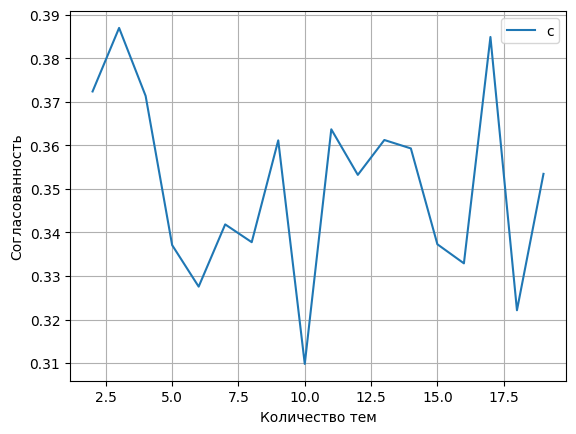

In [ ]:
limit=20; start=2; step=1

x = range(start, limit, step)
plt.plot(x, coherence_values)

plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.grid()

plt.show()

## Оптимальное число тем

In [ ]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
model_topics = optimal_model.show_topics(formatted=False)
print(f'''Ровно {x[best_result_index]} темы дают наибольшую согласованность равную {coherence_values[best_result_index]}''')

Ровно 3 темы дают наибольшую согласованность равную 0.3869411394421074


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Итоговая модель и визуализация

In [ ]:
res_model = LdaModel(
    id2word=optimal_model.id2word,
    num_topics=optimal_model.num_topics,
    alpha=optimal_model.alpha,
    eta=0
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(res_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000534 -0.001321       1        1  40.216428
1     -0.001000  0.001078       2        1  30.911443
0      0.001533  0.000243       3        1  28.872129, topic_info=              Term      Freq     Total Category  logprob  loglift
512            top  2.000000  2.000000  Default  30.0000  30.0000
544       navigate  2.000000  2.000000  Default  29.0000  29.0000
1213       connect  2.000000  2.000000  Default  28.0000  28.0000
294          whole  2.000000  2.000000  Default  27.0000  27.0000
1067  lamentations  2.000000  2.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
768          covid  0.885055  2.992916   Topic3  -6.9803   0.0239
706         stable  0.852968  2.646372   Topic3  -7.0172   0.1101
872        indoors  0.853769  2.694104   Topic3  -7.0163   0.0931
671          water  0.849214  2.637971   Topic3  -7.0216   0.1088
352            set  0.847914  2.613763   Topic3  -7.0231   0.1165

[186 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
216       1  0.432130             ...
216       2  0.432130             ...
216       3  0.432130             ...
12        1  0.345075              40
12        2  0.345075              40
...     ...       ...             ...
848       2  0.397356  youtube/movies
848       3  0.397356  youtube/movies
1131      1  0.442317              ~2
1131      2  0.442317              ~2
1131      3  0.442317              ~2

[480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

## Вывод:
В первой теме можно выделить, что пользователи чувствуют тревогу по поводу поиска и/или достижения своей цели в жизни, во второй - имеют общую для большинства людей цель, заключающуюся в счастье, в третьем - саморазвитие упоминается как одна из целей в жизни. 

## Получим подобный результат для датасета "Интернет"

In [ ]:
df_internet["tokens"] = df_internet["lemms"].apply(lambda row: [token for token in row.split()])
values = df_internet["tokens"].values.tolist()
id2word = Dictionary(values)
corpus = [id2word.doc2bow(text) for text in values]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=values, start=2, limit=20, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 18/18 [00:21<00:00,  1.20s/it]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


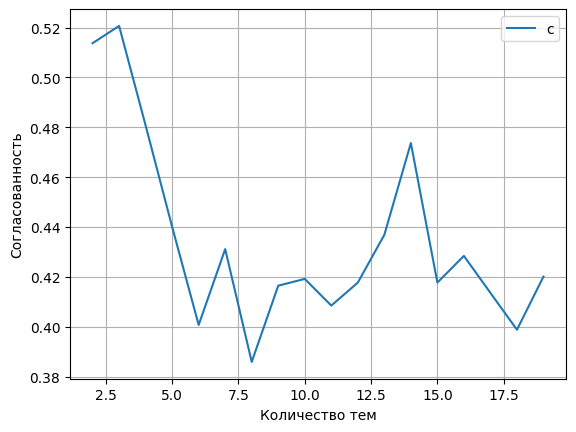

In [ ]:
limit=20; start=2; step=1

x = range(start, limit, step)
plt.plot(x, coherence_values)

plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.grid()

plt.show()

In [ ]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
model_topics = optimal_model.show_topics(formatted=False)
print(f'''Ровно {x[best_result_index]} темы дают наибольшую согласованность равную {coherence_values[best_result_index]}''')

Ровно 3 темы дают наибольшую согласованность равную 0.5206339133116146


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
res_model = LdaModel(
    id2word=optimal_model.id2word,
    num_topics=optimal_model.num_topics,
    alpha=optimal_model.alpha,
    eta=0
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(res_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001581 -0.000276       1        1  46.230143
2      0.001062 -0.001064       2        1  28.770394
0      0.000519  0.001340       3        1  24.999463, topic_info=          Term      Freq     Total Category  logprob  loglift
93          tt  2.000000  2.000000  Default  30.0000  30.0000
799  boyfriend  2.000000  2.000000  Default  29.0000  29.0000
707          😪  2.000000  2.000000  Default  28.0000  28.0000
281     except  2.000000  2.000000  Default  27.0000  27.0000
79      screen  2.000000  2.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
484  disappear  0.679889  2.466431   Topic3  -6.7057   0.0977
933    devices  0.681730  2.616669   Topic3  -6.7030   0.0413
280     essays  0.677889  2.434774   Topic3  -6.7086   0.1077
15       first  0.678985  2.571987   Topic3  -6.7070   0.0545
839     virtue  0.678150  2.550234   Topic3  -6.7082   0.0617

[174 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
602       1  0.443100  10min
602       2  0.443100  10min
602       3  0.443100  10min
110       1  0.459236  50/50
110       2  0.459236  50/50
...     ...       ...    ...
167       2  0.415288      😭
167       3  0.415288      😭
156       1  0.432735   🙋‍♀️
156       2  0.432735   🙋‍♀️
156       3  0.432735   🙋‍♀️

[426 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## Выводы:
Можно выделить примерно следующие темы: комментарии о нахождении в интернете от одиноких людей, комментарии о прокрастинации в интернете и о поиске в интернете комфорта и понимания.


# Анализ сентиментов

## Проблема
Наши комментарии на английском языке, а значит библиотека dostoevsky не подходит для задачи анализа сентиментов.\\
Воспользуемся SentimentIntensityAnalyzer из nltk


In [ ]:
analyzer = SentimentIntensityAnalyzer()
df_activities['tone'] = df_activities['lemms'].apply(analyzer.polarity_scores)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Данный способ возвращает словарь со значениями сентиментов, поэтому его надо обработать

In [ ]:
for i in range(len(df_activities)):
    df_activities.iloc[i, 3] = max(df_activities.iloc[i, 3], key=df_activities.iloc[i, 3].get)

## Визуализация для активностей

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


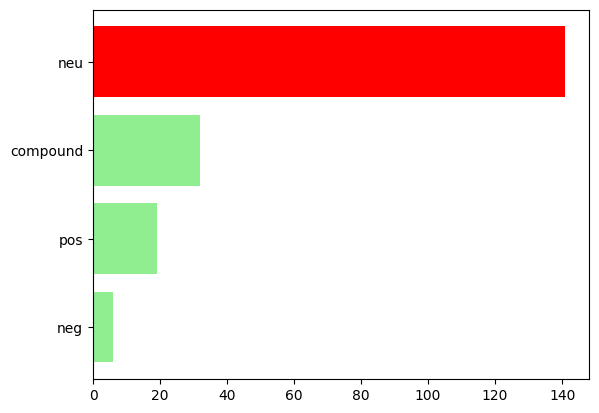

In [ ]:
vis = pd.DataFrame(df_activities['tone'].value_counts()).sort_values(by="tone")

colors = ["lightgreen" for _ in range(3)]+["red"]
plt.barh(y=vis.index, width=vis.tone, color=colors)
plt.show()

## Визуализация для курения

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df_smocking['tone'] = df_smocking['lemms'].apply(analyzer.polarity_scores)

In [ ]:
for i in range(len(df_smocking)):
    df_smocking.iloc[i, 3] = max(df_smocking.iloc[i, 3], key=df_smocking.iloc[i, 3].get)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


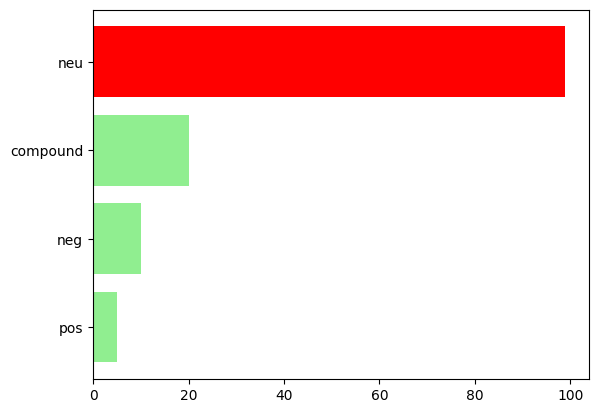

In [ ]:
vis = pd.DataFrame(df_smocking['tone'].value_counts()).sort_values(by="tone")

colors = ["lightgreen" for _ in range(3)]+["red"]
plt.barh(y=vis.index, width=vis.tone, color=colors)
plt.show()

## Выводы:
1. В результате и комментарии про курение, и комментарии про активности преимущественно имеют нейтральную или смешанную окраску, однако для курения меньшинство относится позитивно, а для активностей меньшинство - негативно.

# Распределение слов


## Датасет "Хобби"

Столбец "tokens" содержит массивы с леммами, а для данной визуализации нам необходим один общий массив со всеми встречающимися словами.\
Соберём данный массив.

In [ ]:
df_hobbies["tokens"] = df_hobbies["lemms"].apply(lambda row: [token for token in row.split()])
arr = []
for i in range(len(df_hobbies)):
    arr += df_hobbies['tokens'].iloc[i]
res = pd.DataFrame(arr, columns=["terms"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


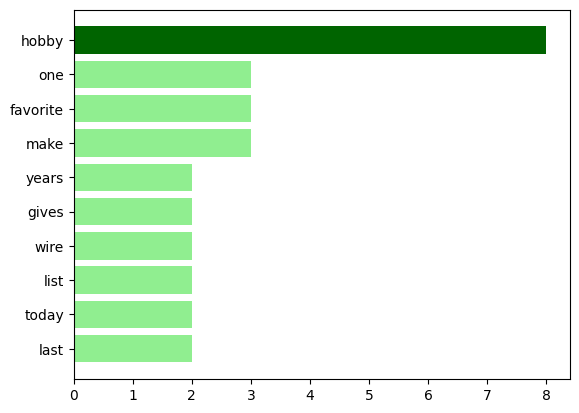

In [ ]:
vis = pd.DataFrame(res.terms.value_counts()).sort_values(by="terms", ascending=False)[:10].sort_values(by="terms")
colors = ["lightgreen" for _ in range(9)]+["darkgreen"]
plt.barh(y=vis.index, width=vis.terms, color=colors)
plt.show()

# Облако слово

## Импорт файла с музыкальными комментариями

In [ ]:
music_file = open('/content/drive/MyDrive/music.txt')
music_text = music_file.readline()

## Обработка текста + использование функции Counter для посчёта количества уникальных слов

In [ ]:
temp = prep.text_preprocess(music_text)
res = temp.split()
words = dict(Counter(res))

## Облако (нота) слов

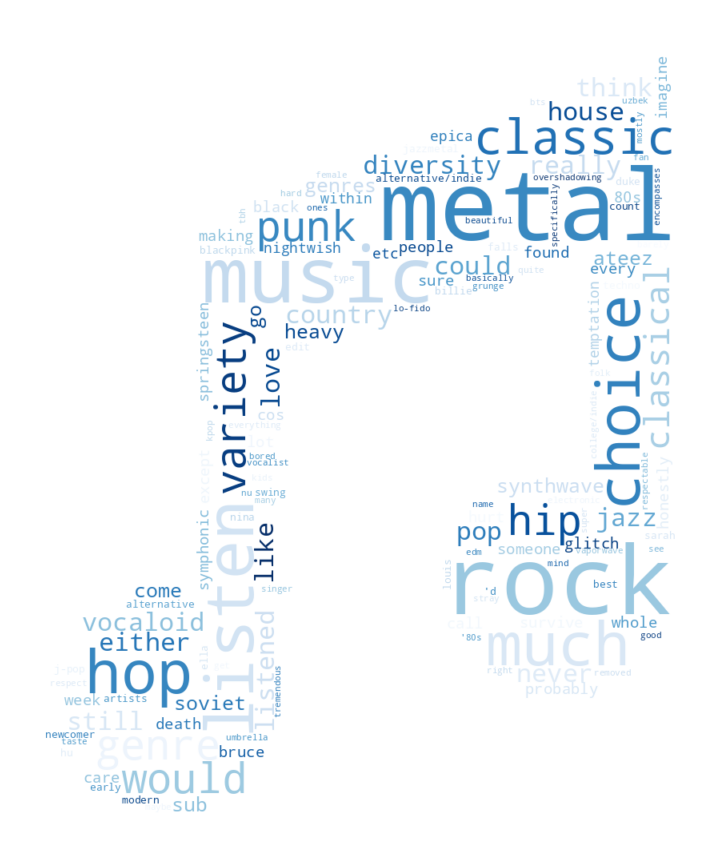

In [ ]:
url = "https://www.pinclipart.com/picdir/middle/561-5613702_music-notes-comments-music-note-svg-file-clipart.png"
response = requests.get(url)
cloud_mask = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(background_color="white", max_words=200, mask=cloud_mask, colormap="Blues")
wc.generate_from_frequencies(words)

plt.figure(figsize=(11, 11))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Выводы:
1. По облаку очевидно можно сказать, какие слова упоминались в комментариях чаще всего - metal, rock, classic, hop.

# Графовая модель

## Соберём пары слов и количество уникальных пар

In [ ]:
pairs = []
for doc in df_timespending.lemms.tolist():
    if doc:
        b = list((nltk.bigrams(doc.split())))
        if b:
            pairs.extend(b)

pairs = [tuple(sorted(pair)) for pair in pairs]
word_pairs = dict(Counter(pairs))
word_pairs = [(pair[0], pair[1], val) for pair, val in word_pairs.items() if val > 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
G = nx.Graph()
edges = word_pairs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


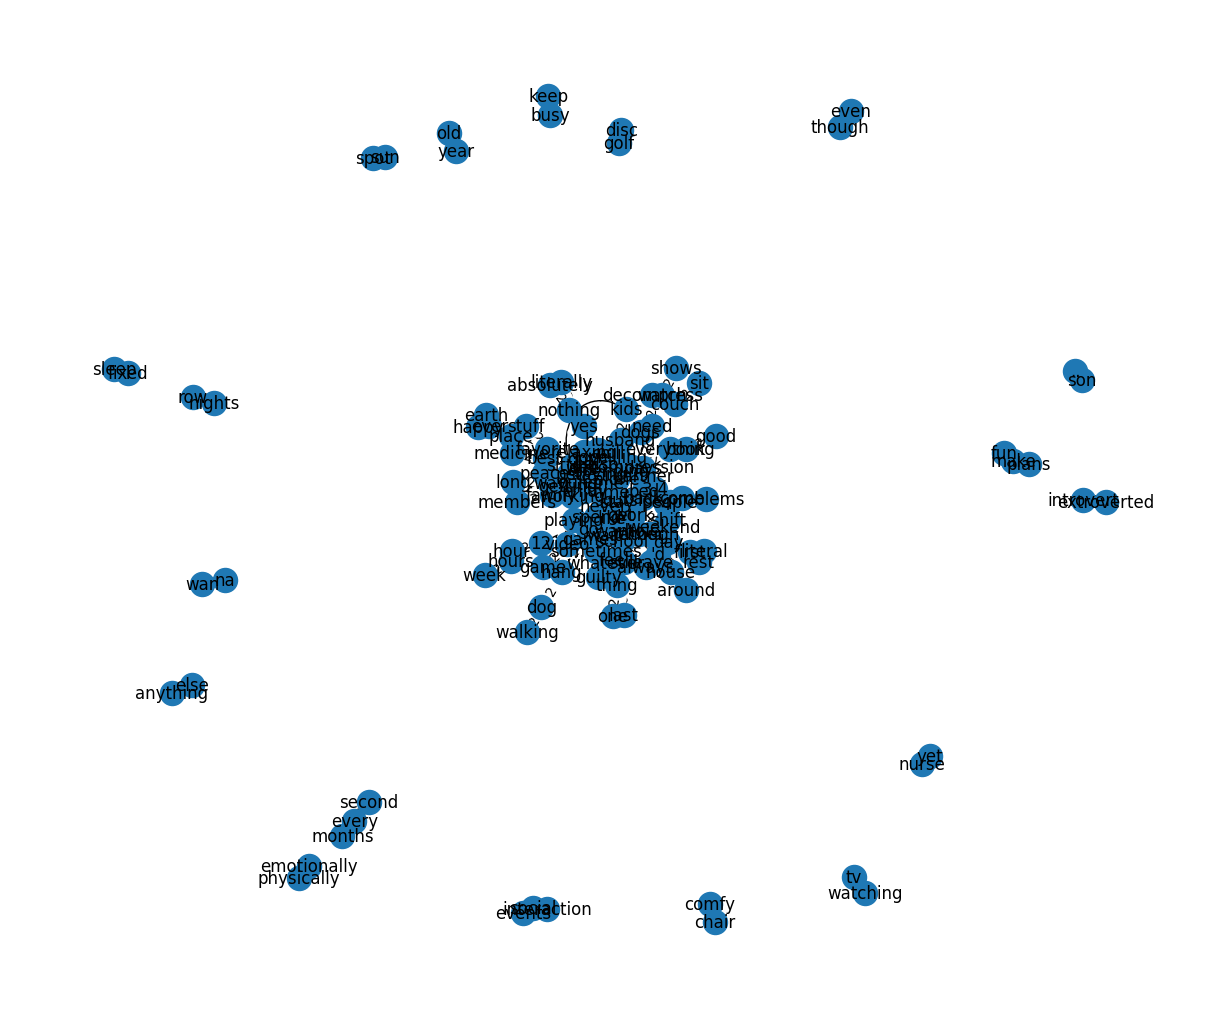

In [ ]:
plt.figure(figsize=(12,10))
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
remove_edge = [pair for pair in G.edges() if pair[0] in remove and pair[1] in remove]
G.remove_edges_from(remove_edge)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


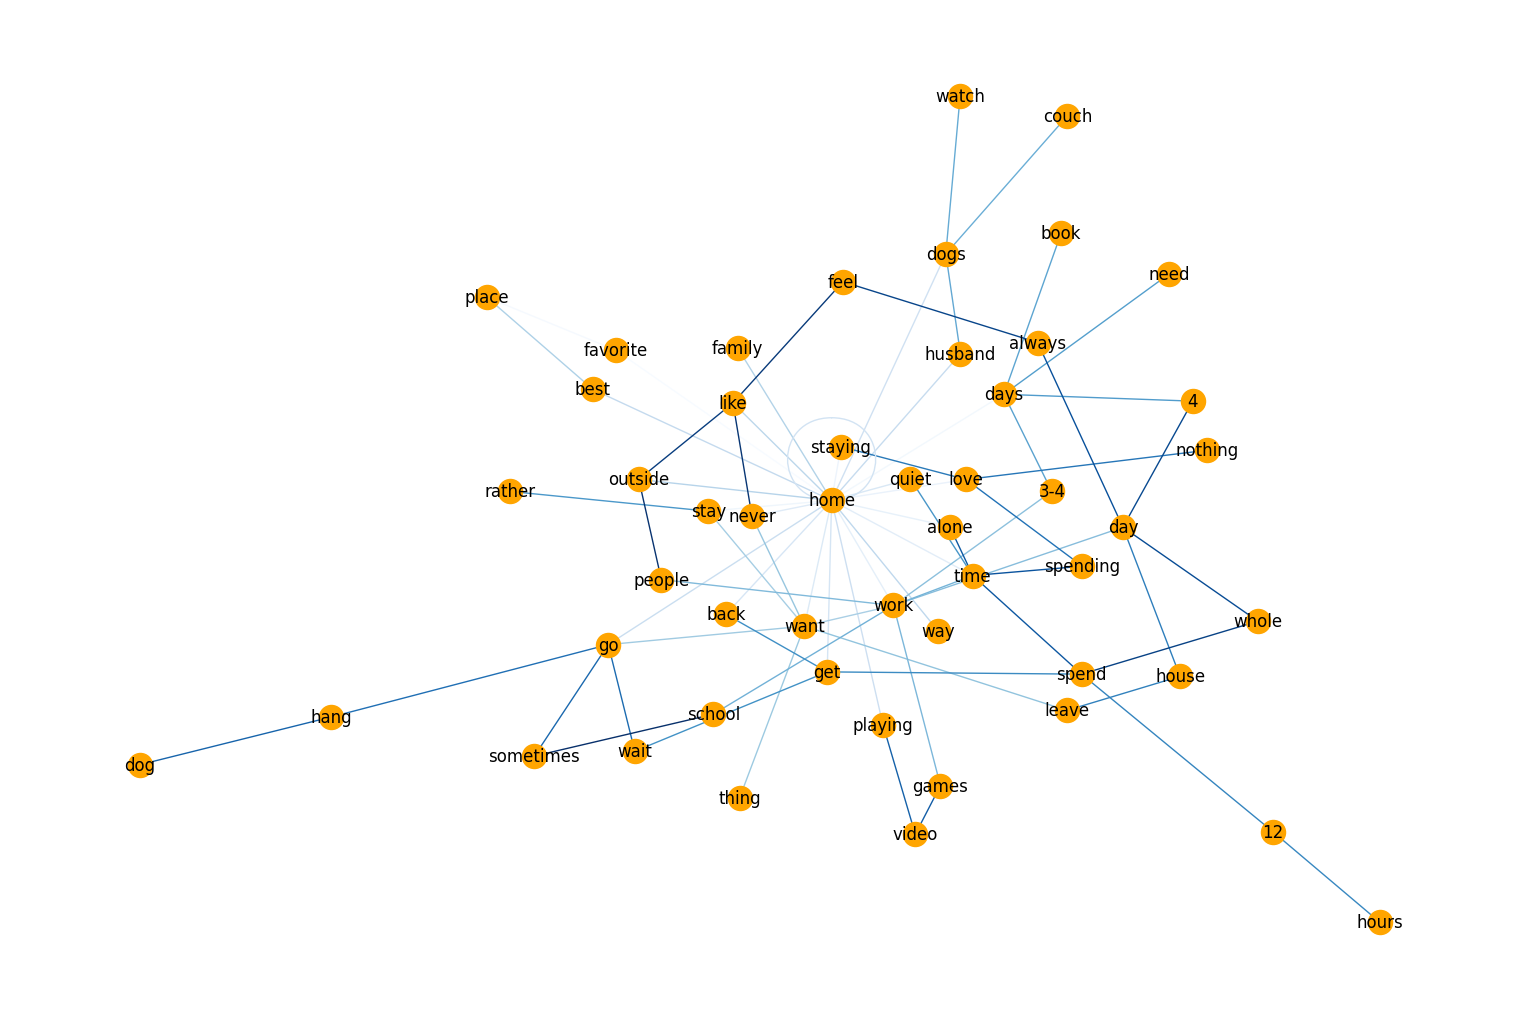

In [ ]:
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange', edgelist=G.edges(), edge_color=range(len(G.edges())), width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

## Выводы:
1. Получили граф, по которому можно отследить связи между наиболее частотными и наиболее значимыми для корпуса словами словами. Например можно заметить, что есть связь people - outside, home - quiet и т.д.